### Data cleaning and data converting

## NAN data

In [1]:
import os
import pandas as pd

import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [85]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

key_fields=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','room_type','host_is_superhost','instant_bookable']

df = pd.read_csv('listings.csv',usecols=key_fields)
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
df['host_response_rate'] = df.host_response_rate.str.replace('%','').astype(float)
print(df.shape)

(19896, 12)


In [108]:
df.head()

,host_about,host_response_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,"Hello I am a Professional designer, a traveler...",100.0,f,3.0,Private room,2,"[""Kitchen"", ""Essentials"", ""Cable TV"", ""Air con...",55.0,3,2,100.0,f
1,"Hi. I'm Etain, though everyone calls me by my...",100.0,t,6.0,Entire home/apt,6,"[""Bed linens"", ""Cooking basics"", ""Heating"", ""L...",180.0,3,52,95.0,t
2,I'm Nick your English host in Barcelona.\r\n\r...,100.0,f,5.0,Entire home/apt,6,"[""Elevator"", ""Hot water"", ""Hangers"", ""Stove"", ...",109.0,2,63,86.0,t
3,"Hello I am a Professional designer, a traveler...",100.0,f,3.0,Private room,2,"[""Kitchen"", ""Cable TV"", ""Air conditioning"", ""E...",40.0,30,8,68.0,f
4,"Hello I am a Professional designer, a traveler...",100.0,f,3.0,Entire home/apt,9,"[""Elevator"", ""Hot water"", ""Host greets you"", ""...",131.0,4,149,91.0,t


### text data

In [3]:
def calculation(col_list,col_len,df_col,delimiter:'str'):
    col_list
    for i in df_col:
    
        if isinstance(i, str)== False:
            j=str(i)
            col_list.append(j.split(delimiter))
    
        else:
            col_list.append(i.split(delimiter))
    
    col_len
    for k in col_list:
        p=len(k)
        col_len.append(p)  

In [4]:
# for host about
host_about_list=[]
host_about_len=[]

calculation(host_about_list,host_about_len,df.host_about," ")

print(type(host_about_list))
print(host_about_list[0][0])
print(host_about_len[0])
print(host_about_list[0])

<class 'list'>
Hello
18
['Hello', 'I', 'am', 'a', 'Professional', 'designer,', 'a', 'traveler,', 'an', 'entrepreneur.', 'I', 'try', 'always', 'to', 'find', 'a', 'solution.', '']


In [5]:
# for amentities 
amenities_list=[]
amenities_len=[]

calculation(amenities_list,amenities_len,df.amenities,",")

print(type(amenities_list))
print(amenities_list[0][0])
print(amenities_len[0])
print(amenities_list[0])

<class 'list'>
["Kitchen"
13
['["Kitchen"', ' "Essentials"', ' "Cable TV"', ' "Air conditioning"', ' "Washer"', ' "Elevator"', ' "Dryer"', ' "Wifi"', ' "TV"', ' "Heating"', ' "Smoke alarm"', ' "Fire extinguisher"', ' "Carbon monoxide alarm"]']


In [6]:
df['host_about'] = host_about_len
df['amenities'] = amenities_len

In [7]:
df.sample(4, random_state=42)[['amenities','host_about']]

,amenities,host_about
9507,31,7
1512,31,30
17433,7,5
8477,13,1


### boolean data

In [8]:
bools = ['instant_bookable','host_is_superhost']
df[bools]

,instant_bookable,host_is_superhost
0,f,f
1,t,t
2,t,f
3,f,f
4,t,f
...,...,...
19891,f,f
19892,t,f
19893,f,f
19894,f,f


In [9]:
bools = ['instant_bookable','host_is_superhost']
key={'t':True,'f':False}
for b in bools:
    df[b] = df[b].replace(key).astype('bool')
df.sample(3, random_state=42)[bools]

,instant_bookable,host_is_superhost
9507,True,False
1512,False,False
17433,True,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 19896 non-null  int64  
 1   host_response_rate         12409 non-null  float64
 2   host_is_superhost          19896 non-null  bool   
 3   host_total_listings_count  19889 non-null  float64
 4   room_type                  19896 non-null  object 
 5   accommodates               19896 non-null  int64  
 6   amenities                  19896 non-null  int64  
 7   price                      19896 non-null  float64
 8   minimum_nights             19896 non-null  int64  
 9   number_of_reviews          19896 non-null  int64  
 10  review_scores_rating       13773 non-null  float64
 11  instant_bookable           19896 non-null  bool   
dtypes: bool(2), float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
### categorical data

In [12]:
df['room_type']=df['room_type'].astype('category')

In [13]:
# check out the new dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_about                 19896 non-null  int64   
 1   host_response_rate         12409 non-null  float64 
 2   host_is_superhost          19896 non-null  bool    
 3   host_total_listings_count  19889 non-null  float64 
 4   room_type                  19896 non-null  category
 5   accommodates               19896 non-null  int64   
 6   amenities                  19896 non-null  int64   
 7   price                      19896 non-null  float64 
 8   minimum_nights             19896 non-null  int64   
 9   number_of_reviews          19896 non-null  int64   
 10  review_scores_rating       13773 non-null  float64 
 11  instant_bookable           19896 non-null  bool    
dtypes: bool(2), category(1), float64(4), int64(5)
memory usage: 1.4 MB


### drop nan

In [14]:
'''df.drop(index=(df[(df.host_about.isna()) | (df.host_response_rate.isna()) 
                  | (df.host_is_superhost.isna())|(df.host_total_listings_count.isna())
                 |(df.room_type.isna())|(df.accommodates.isna())|(df.amenities.isna())
                 |(df.price.isna())|(df.minimum_nights.isna())|(df.number_of_reviews.isna())
                 |(df.instant_bookable.isna())|(df.review_scores_rating.isna())].index), inplace=True)
print(df.shape)'''
df.dropna(inplace=True)
print(df.shape)

(8874, 12)


### outlier

In [15]:
numerical=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating']
df_o1 = df[numerical]
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = df[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

host_about                   85.0
host_response_rate            9.0
host_total_listings_count    19.0
accommodates                  3.0
amenities                    13.0
price                        67.0
minimum_nights                4.0
number_of_reviews            66.0
review_scores_rating          9.0
dtype: float64


(4019, 12)

In [16]:
df_out.describe()

,host_about,host_response_rate,host_total_listings_count,accommodates,amenities,price,minimum_nights,number_of_reviews,review_scores_rating
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,40.890271,97.770092,7.867380,3.472257,22.805175,68.230654,2.190595,45.803434,92.790495
std,50.214450,5.227659,9.828802,1.906191,8.412263,44.642307,1.395257,45.110060,5.581149
min,1.000000,78.000000,0.000000,1.000000,1.000000,9.710000,1.000000,1.000000,75.000000
25%,1.000000,100.000000,1.000000,2.000000,17.000000,30.000000,1.000000,8.000000,89.000000
50%,24.000000,100.000000,3.000000,3.000000,23.000000,58.000000,2.000000,30.000000,94.000000
75%,59.000000,100.000000,11.000000,5.000000,29.000000,96.500000,3.000000,73.000000,97.000000
max,213.000000,100.000000,47.000000,9.000000,48.000000,201.000000,10.000000,169.000000,100.000000


In [17]:
'''index_name=df_out.index

df.drop(index_name, inplace=True)

print(df.shape)'''

'index_name=df_out.index\n\ndf.drop(index_name, inplace=True)\n\nprint(df.shape)'

In [21]:
df_out.to_csv('data_cleaning.csv',index=False)

### fit the regression model

In [52]:
df1=pd.read_csv('data_cleaning.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4019 non-null   int64  
 1   host_response_rate         4019 non-null   float64
 2   host_is_superhost          4019 non-null   bool   
 3   host_total_listings_count  4019 non-null   float64
 4   room_type                  4019 non-null   object 
 5   accommodates               4019 non-null   int64  
 6   amenities                  4019 non-null   int64  
 7   price                      4019 non-null   float64
 8   minimum_nights             4019 non-null   int64  
 9   number_of_reviews          4019 non-null   int64  
 10  review_scores_rating       4019 non-null   float64
 11  instant_bookable           4019 non-null   bool   
dtypes: bool(2), float64(4), int64(5), object(1)
memory usage: 322.0+ KB


In [53]:
df1 = pd.get_dummies(df1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4019 non-null   int64  
 1   host_response_rate         4019 non-null   float64
 2   host_is_superhost          4019 non-null   bool   
 3   host_total_listings_count  4019 non-null   float64
 4   accommodates               4019 non-null   int64  
 5   amenities                  4019 non-null   int64  
 6   price                      4019 non-null   float64
 7   minimum_nights             4019 non-null   int64  
 8   number_of_reviews          4019 non-null   int64  
 9   review_scores_rating       4019 non-null   float64
 10  instant_bookable           4019 non-null   bool   
 11  room_type_Entire home/apt  4019 non-null   uint8  
 12  room_type_Hotel room       4019 non-null   uint8  
 13  room_type_Private room     4019 non-null   uint8

In [54]:
df1=df1.rename(columns={"room_type_Shared room": "room_type_Shared_room",
                         "room_type_Hotel room": "room_type_Hotel_room",
                        "room_type_Private room":"room_type_Private_room",
                        "room_type_Entire home/apt": "room_type_Entire_home"})

In [22]:
df1.describe()

,host_about,host_response_rate,host_total_listings_count,accommodates,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,40.890271,97.770092,7.867380,3.472257,22.805175,68.230654,2.190595,45.803434,92.790495,0.515800,0.025877,0.451854,0.006469
std,50.214450,5.227659,9.828802,1.906191,8.412263,44.642307,1.395257,45.110060,5.581149,0.499812,0.158788,0.497738,0.080181
min,1.000000,78.000000,0.000000,1.000000,1.000000,9.710000,1.000000,1.000000,75.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,100.000000,1.000000,2.000000,17.000000,30.000000,1.000000,8.000000,89.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,100.000000,3.000000,3.000000,23.000000,58.000000,2.000000,30.000000,94.000000,1.000000,0.000000,0.000000,0.000000
75%,59.000000,100.000000,11.000000,5.000000,29.000000,96.500000,3.000000,73.000000,97.000000,1.000000,0.000000,1.000000,0.000000
max,213.000000,100.000000,47.000000,9.000000,48.000000,201.000000,10.000000,169.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features x, not the response variable y
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [70]:
variables_raw = ['review_scores_rating','room_type_Hotel_room', 'room_type_Entire_home', 'room_type_Private_room', 'room_type_Shared_room']
#['room_type_Private_room', 'room_type_Shared_room']


#drop_column_using_vif_(df, thresh=5)
df_VIF = drop_column_using_vif_(df1[variables_raw].drop('review_scores_rating', axis=1))


In [ ]:
df

In [ ]:
df_final = df_numeric.drop(['room_type_Entire home/apt',], axis=1)

# double check the result
df_final.info()

### final results

In [60]:
# Selecting model
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# df.info()
# df.describe()
# df.columns.values
mod1 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate
+ amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + instant_bookable+ room_type_Shared_room +room_type_Private_room + host_total_listings_count + accommodates ''', df1)
res1 = mod1.fit()
print(res1.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.201
Model:                              OLS   Adj. R-squared:                  0.199
Method:                   Least Squares   F-statistic:                     101.1
Date:                  Sun, 06 Dec 2020   Prob (F-statistic):          2.03e-187
Time:                          20:20:26   Log-Likelihood:                -12161.
No. Observations:                  4019   AIC:                         2.434e+04
Df Residuals:                      4008   BIC:                         2.441e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [80]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# df.info()
# df.describe()
# df.columns.values
mod1 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate
+ amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + instant_bookable+ room_type_Shared_room +room_type_Private_room + host_total_listings_count + accommodates ''', df1)
res1 = mod1.fit()
#drop host response rate and shared room
mod2 = sm.formula.ols('''review_scores_rating ~ host_about
+ amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + instant_bookable+room_type_Private_room + host_total_listings_count + accommodates ''', df1)
res2 = mod2.fit()
#host_about,minimum nights
mod3 = sm.formula.ols('''review_scores_rating ~ 
+ amenities + price + number_of_reviews
+ host_is_superhost + instant_bookable+ room_type_Private_room + host_total_listings_count + accommodates ''', df1)
res3 = mod3.fit()

#mod4 = sm.formula.ols('''review_scores_rating ~ host_about
#+ amenities + price + number_of_reviews
#+ host_is_superhost + instant_bookable+ host_total_listings_count + accommodates ''', df1)
#res4 = mod4.fit()

#model_case_annual_policies.summary()
print(res3.summary())

dfoutput = summary_col([res1,res2,res3],stars=True)
print(dfoutput)

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.201
Model:                              OLS   Adj. R-squared:                  0.200
Method:                   Least Squares   F-statistic:                     126.3
Date:                  Sun, 06 Dec 2020   Prob (F-statistic):          2.08e-189
Time:                          20:46:29   Log-Likelihood:                -12161.
No. Observations:                  4019   AIC:                         2.434e+04
Df Residuals:                      4010   BIC:                         2.440e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [111]:
dfoutput.save('output.png')

AttributeError: 'Summary' object has no attribute 'save'

In [10]:
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features x, not the response variable y
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [16]:
variables_raw = ['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating']


# drop_column_using_vif_(df, thresh=5)
df_VIF = drop_column_using_vif_(df1[variables_raw].drop('review_scores_rating', axis=1))


In [23]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

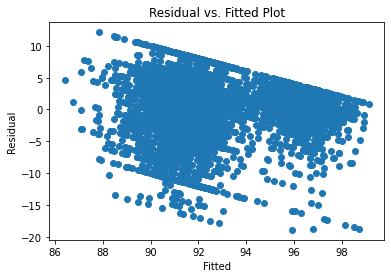

In [45]:
plt.scatter(res1.fittedvalues, res1.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

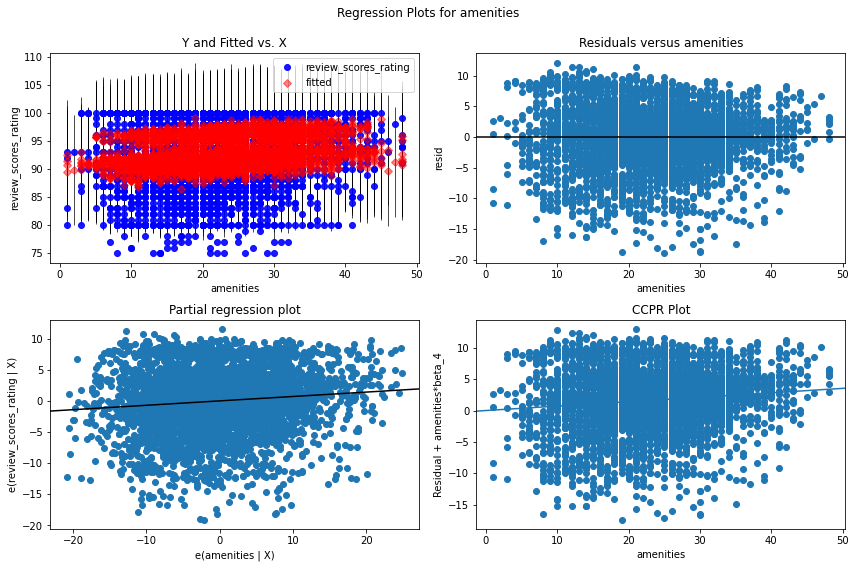

In [118]:
#number_of_reviews
#price
#
import matplotlib.pyplot as plt
key_fields=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','room_type','host_is_superhost','instant_bookable']
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res2, 'amenities', fig=fig)
plt.savefig('residual analysis.png')

### refine the model

In [67]:
refine_fields=['host_about','host_response_rate','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','host_is_superhost','instant_bookable']

df2=pd.read_csv('data_cleaning.csv',usecols=refine_fields)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_about            4855 non-null   int64  
 1   host_response_rate    4855 non-null   float64
 2   host_is_superhost     4855 non-null   bool   
 3   amenities             4855 non-null   int64  
 4   price                 4855 non-null   float64
 5   minimum_nights        4855 non-null   int64  
 6   number_of_reviews     4855 non-null   int64  
 7   review_scores_rating  4855 non-null   float64
 8   instant_bookable      4855 non-null   bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 275.1 KB


In [72]:
# Selecting model
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# df.info()
# df.describe()
# df.columns.values
mod2 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate + amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + instant_bookable''', df2)
res2 = mod2.fit()
#model_case_annual_policies.summary()
print(res2.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.121
Model:                              OLS   Adj. R-squared:                  0.120
Method:                   Least Squares   F-statistic:                     83.56
Date:                  Sat, 05 Dec 2020   Prob (F-statistic):          4.40e-130
Time:                          21:51:14   Log-Likelihood:                -18866.
No. Observations:                  4855   AIC:                         3.775e+04
Df Residuals:                      4846   BIC:                         3.781e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [70]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

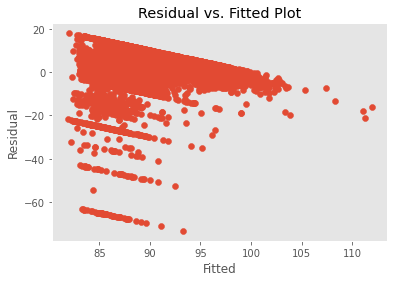

In [73]:
plt.scatter(res2.fittedvalues, res2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()